#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 08
**CH08C Measurement error in hotel ratings**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")


In [2]:
# load vienna
hotels = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-vienna.csv")
#data = pd.read_csv("https://osf.io/y6jvb/download")

#### SAMPLE SELECTION

In [3]:
hotels = hotels.loc[
    (hotels["accommodation_type"] == "Hotel")
    & (hotels["city_actual"] == "Vienna")
    & (hotels["stars"] >= 3)
    & (hotels["stars"] <= 4)
    & (hotels["stars"].notna())
    & (hotels["price"] <= 600)
]

### Look at measurement error by rating count


In [ ]:
hotels["lnprice"] = np.log(hotels["price"])


In [5]:
hotels[["price", "lnprice"]].describe()

,price,lnprice
count,207.000000,207.000000
mean,109.975845,4.640219
std,42.221381,0.336751
min,50.000000,3.912023
25%,82.000000,4.406719
50%,100.000000,4.605170
75%,129.500000,4.863673
max,383.000000,5.948035


In [6]:
hotels["price"].describe(),hotels["lnprice"].describe()

(count    207.000000
 mean     109.975845
 std       42.221381
 min       50.000000
 25%       82.000000
 50%      100.000000
 75%      129.500000
 max      383.000000
 Name: price, dtype: float64,
 count    207.000000
 mean       4.640219
 std        0.336751
 min        3.912023
 25%        4.406719
 50%        4.605170
 75%        4.863673
 max        5.948035
 Name: lnprice, dtype: float64)

In [7]:
hotels["rating_count"]

1      189.0
2       53.0
3       55.0
4       33.0
6       57.0
       ...  
420     77.0
421    572.0
422     53.0
425    112.0
426    169.0
Name: rating_count, Length: 207, dtype: float64

In [8]:
# define cutoffs
k1 = 100
k2 = 200

In [9]:
reg_ln = smf.ols(
    formula="lnprice ~ rating", data=hotels.loc[hotels["rating_count"] < k1, :]
)
reg_ln_fit = reg_ln.fit()


reg = smf.ols(
    formula="price ~ rating", data=hotels.loc[hotels["rating_count"] < k1, :]
)
reg_fit = reg.fit()

In [36]:
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.08e-05
Time:                        01:17:19   Log-Likelihood:                -370.27
No. Observations:                  77   AIC:                             744.5
Df Residuals:                      75   BIC:                             749.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.2939     32.126     -1.659      0.1

In [11]:
print(reg_ln_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.20
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           4.99e-06
Time:                        01:10:42   Log-Likelihood:                -6.3405
No. Observations:                  77   AIC:                             16.68
Df Residuals:                      75   BIC:                             21.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1375      0.285     11.025      0.0

In [45]:
hotels["yhat"] = reg_ln_fit.predict(hotels)


In [34]:
reg_me2 = smf.ols(
    formula="lnprice ~ rating",
    data=hotels.loc[(hotels["rating_count"] >= k1) & (hotels["rating_count"] < k2), :],
)
reg_me_fit2 = reg_me2.fit()
reg_me_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     13.52
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           0.000531
Time:                        01:16:44   Log-Likelihood:                -20.301
No. Observations:                  58   AIC:                             44.60
Df Residuals:                      56   BIC:                             48.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9129      0.482      6.038      0.000       1.946       3.879
rating         0.4380      0.119      3.676      0.001       0.199       0.677
==============================================================================
Omnibus:                       19.349   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.243
Skew:                           1.223   Prob(JB):                     1.21e-06
Kurtosis:                       5.301   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
hotels["yhat2"] = reg_me_fit2.predict(hotels)


In [ ]:
reg_me3 = smf.ols(
    formula="lnprice ~ rating", data=hotels.loc[hotels["rating_count"] >= k2, :]
)
reg_me_fit3 = reg_me3.fit()
reg_me_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.03e-05
Time:                        01:17:34   Log-Likelihood:                -4.1624
No. Observations:                  72   AIC:                             12.32
Df Residuals:                      70   BIC:                             16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3895      0.493      4.849      0.000       1.407       3.372
rating         0.5558      0.117      4.754      0.000       0.323       0.789
==============================================================================
Omnibus:                        2.670   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.857
Skew:                          -0.193   Prob(JB):                        0.395
Kurtosis:                       2.314   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
hotels["yhat3"] = reg_me_fit3.predict(hotels)


In [17]:
import statsmodels.formula.api as smf

# Run OLS regression: price ~ rating + distance
reg2 = smf.ols(
    formula="price ~ rating + distance",
    data=hotels
)
reg2_fit = reg2.fit()

# Print the regression summary
print(reg2_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     39.29
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           3.69e-15
Time:                        01:10:42   Log-Likelihood:                -1034.3
No. Observations:                 207   AIC:                             2075.
Df Residuals:                     204   BIC:                             2085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.1931     28.727     -1.190      0.2

In [63]:
hotels["lnrating"] = np.log(hotels["rating"])

reg_me4 = smf.ols(
    formula="lnprice ~ lnrating", data=hotels)
reg_me_fit4 = reg_me4.fit()
reg_me_fit4.summary()

hotels["yhat4"] = reg_me_fit4.predict(hotels)


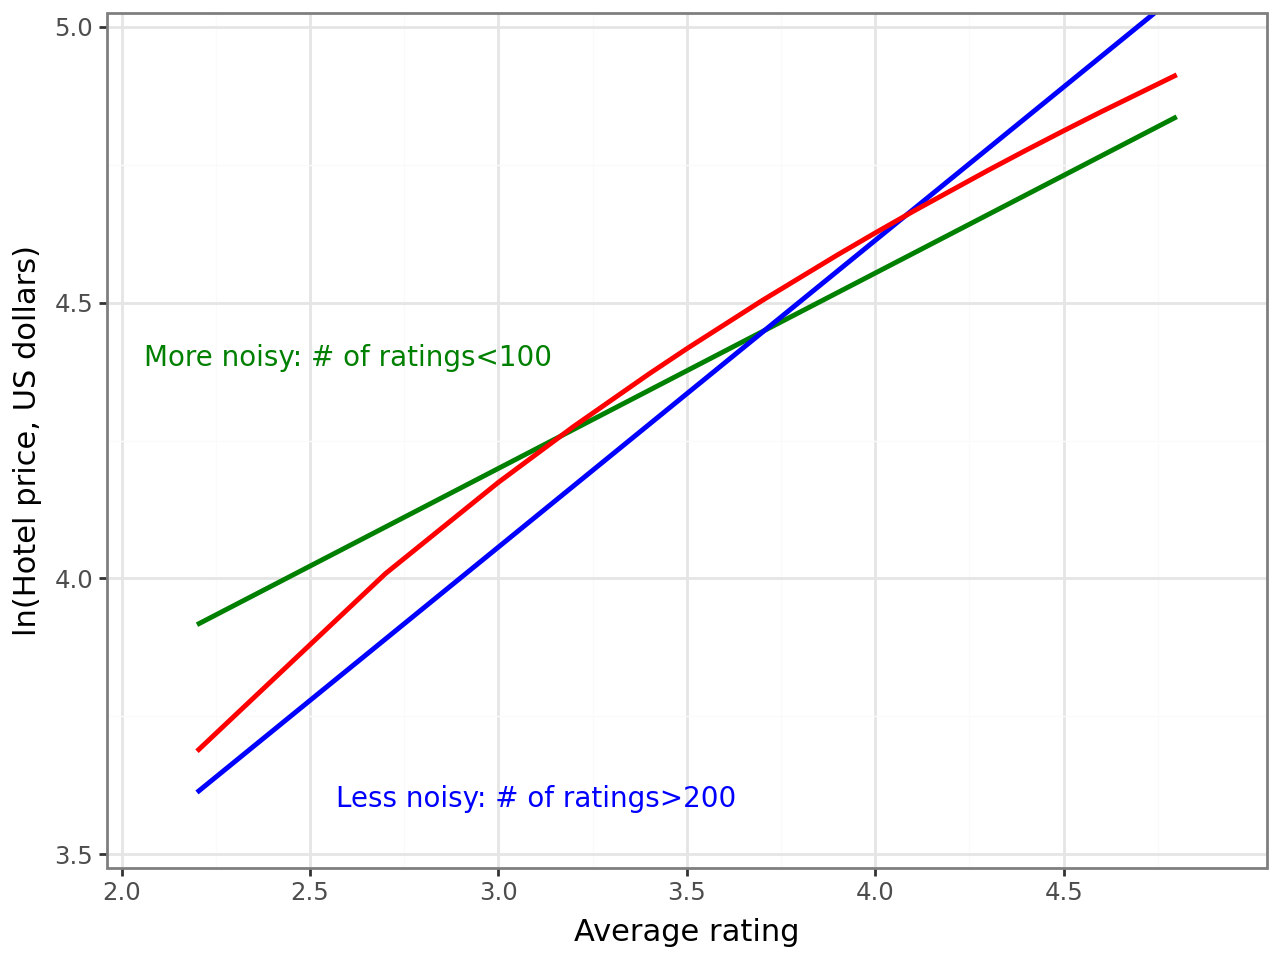

In [64]:
(
    ggplot(hotels)
    + geom_line(aes(x="rating", y="yhat"), color="green", size=1)
    + geom_line(aes(x="rating", y="yhat3"), color="blue", size=1)
    + geom_line(aes(x="rating", y="yhat4"), color="red", size=1)
    + coord_cartesian(xlim=[2, 5], ylim=[3.5, 5])
    + expand_limits(x=0.01, y=0.01)
    + scale_y_continuous(expand=[0.01, 0.01])
    + scale_x_continuous(expand=[0.01, 0.01], limits=[2, 5], breaks=np.arange(2, 5, 0.5))
    + labs(x="Average rating", y="ln(Hotel price, US dollars)")
    + theme_bw()
    + annotate(
        "text",
        x=2.6,
        y=4.4,
        label="More noisy: # of ratings<100",
        size=10,
        color="green",
    )
    + annotate(
        "text",
        x=3.1,
        y=3.6,
        label="Less noisy: # of ratings>200",
        size=10,
        color="blue",
    )
)


In [51]:
print(reg_ln_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.20
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           4.99e-06
Time:                        01:20:29   Log-Likelihood:                -6.3405
No. Observations:                  77   AIC:                             16.68
Df Residuals:                      75   BIC:                             21.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1375      0.285     11.025      0.0

In [59]:
print(reg_me_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.03e-05
Time:                        01:23:12   Log-Likelihood:                -4.1624
No. Observations:                  72   AIC:                             12.32
Df Residuals:                      70   BIC:                             16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3895      0.493      4.849      0.0

In [65]:
print(reg_me_fit4.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     60.00
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           4.29e-13
Time:                        01:33:07   Log-Likelihood:                -41.347
No. Observations:                 207   AIC:                             86.69
Df Residuals:                     205   BIC:                             93.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4482      0.284      8.628      0.0

In [58]:
print(hotels.loc[hotels["rating_count"] < k2, "rating"].describe()), print(hotels.loc[hotels["rating_count"] >= k2, "rating"].describe())

count    135.000000
mean       3.974815
std        0.410809
min        2.200000
25%        3.700000
50%        4.000000
75%        4.300000
max        4.600000
Name: rating, dtype: float64
count    72.000000
mean      4.206944
std       0.263950
min       3.400000
25%       4.000000
50%       4.100000
75%       4.400000
max       4.800000
Name: rating, dtype: float64


(None, None)